# Unlocking Cognitive Health Insights: Data Science Opportunities with a Multifaceted Dataset

#### Javier Corpus

## Introduction
A cognitive score is a numerical representation of an individual's cognitive abilities, which include functions like memory, attention, reasoning, problem-solving, language comprehension, and decision-making. These scores are derived from standardized tests designed to assess different aspects of cognition and are used in clinical, educational, and research settings.

With enough information, we can derive insights that benefit different types of industries, including healthcare, corporate wellness, and education.

## Why is a Cognitive Score Important?
1.	Diagnosis of Cognitive Impairment – Helps identify conditions like dementia, Alzheimer’s disease, traumatic brain injury (TBI), or learning disabilities.
2.	Monitoring Cognitive Decline or Improvement – Tracks changes over time in aging individuals or patients undergoing treatment.
3.	Educational and Workplace Assessments – Determines learning disabilities, giftedness, or job-related cognitive demands.
4.	Research and Clinical Trials – Used to measure the effectiveness of interventions (e.g., medications, therapies).
5.	Mental Health Evaluations – Assesses cognitive effects of depression, schizophrenia, or ADHD.

## Dataset used
The dataset used for this exercised was obtained from https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis. It has the following fields:

|**Field**|**Description**|
|---|---|
|User ID|A unique identifier assigned to each user in the dataset.|
|Age|The age of the individual, represented as a numerical value.|
|Gender|The gender of the individual (Male, Female, or Other).|
|Sleep_Duration|The average number of hours the individual sleeps per night.|
|Stress_Level|The self-reported stress level on a scale from 1 to 10, where 1 indicates no stress and 10 indicates extreme stress.|
|Diet_Type|The dietary preference of the individual, categorized as Vegetarian, Non-Vegetarian, or Vegan.|
|Daily_Sceen_Time|The average number of hours spent on digital screens (e.g., phone, computer, TV) per day.|
|Exercise_Frequency|The frequency of physical exercise, categorized as Low, Medium, or High.|
|Caffeine_Intake|The amount of caffeine consumed daily, measured in milligrams (mg).|
|Reaction_Time|The individual’s reaction time in milliseconds (ms), measured through cognitive tests.|
|Memory_Test_Score|Score from 0 to 100.|
|Cognitive_Score|Score from 0 to 100.|
|AI_Predicted_Score|Score from 0 to 100.|

## Problem Statement
For this exercise, we want to answer the following questions.

1. Is it possible to predict an individual’s Cognitive Score based on lifestyle factors such as sleep, stress, diet, age, and screen time?
2. Which lifestyle habits are more strongly correlated with Memory Test Score?
3. How do Sleep Duration and Stress Level affect Reaction Time?
4. Which lifestyle factors (Sleep Duration, Exercise Time, Caffeine Intake, Daily Screen Time) affect Stress Level.

## Proposed solution
Cognitive Score is a continuous variable, and a regression model can be used to predict it (such as Linear Regression, Random Forest, or XGBoost). This type of model can also help us understand how sleep duration and stress level affect an individual’s reaction time, and how different factors affect the stress level.

Individuals can be classified in three groups for Memory Score: Low, Average and High. This can be done using a Logistic Regression Model.

## Graphical Analysis


In [49]:
# Importing the required libraries and loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('human_cognitive_performance.csv')
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


## Histogram - Cognitive Score Distribution, staked by Memory Score Group.

This histogram shows the distribution of the cognitive score, stacked by Memory Score Group (low, medium or high). Not unexpectedly, in the lowest cognitive scores we have mostly low memory scores as well. What is surprising is finding high memory scores with a low cognitive score, and viceversa. We can see some results with low memory score, but a cognitive score of 100. 

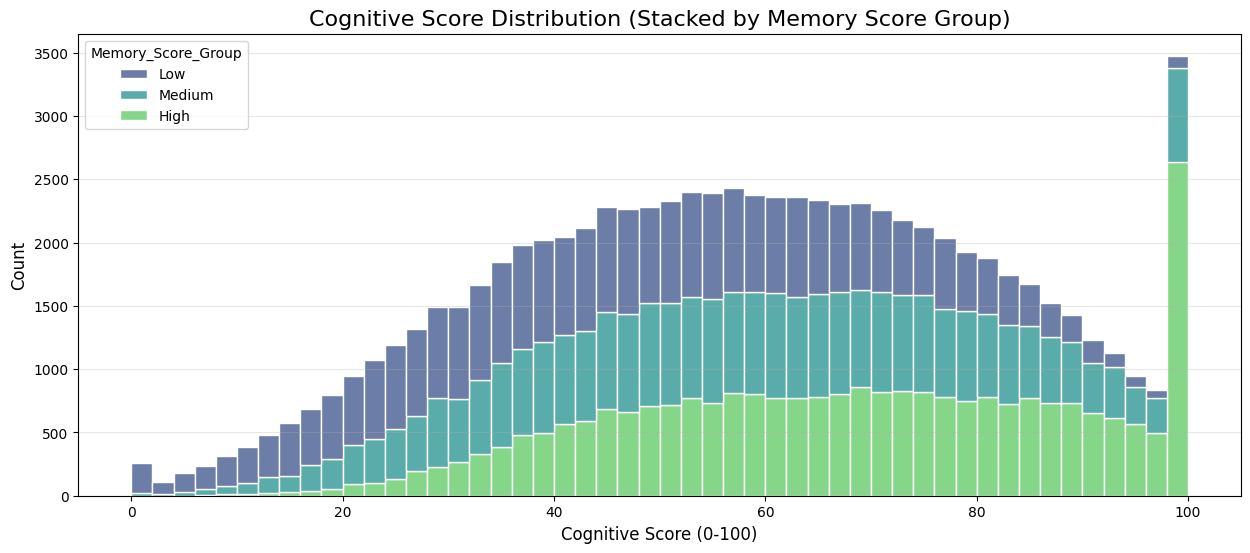

In [50]:
# Grouping all the scores in three bins
df['Memory_Score_Group'] = pd.cut(
    df['Memory_Test_Score'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

plt.figure(figsize=(15, 6))
sns.histplot(
    data=df,
    x='Cognitive_Score',
    hue='Memory_Score_Group',
    multiple='stack',
    palette='viridis',
    bins=50,
    edgecolor='white'
)
plt.title('Cognitive Score Distribution (Stacked by Memory Score Group)', fontsize=16)
plt.xlabel('Cognitive Score (0-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Box Plot - Cognitive Score by Diet Type.

This visualization shows that the average cognitive score (around 60) is the same for all three diet types, however the vegan's lowest score is higher than the other two diet types. Over all, vegans had higher scores. Non-Vegetarians is the only group that scores from 0 to 100.

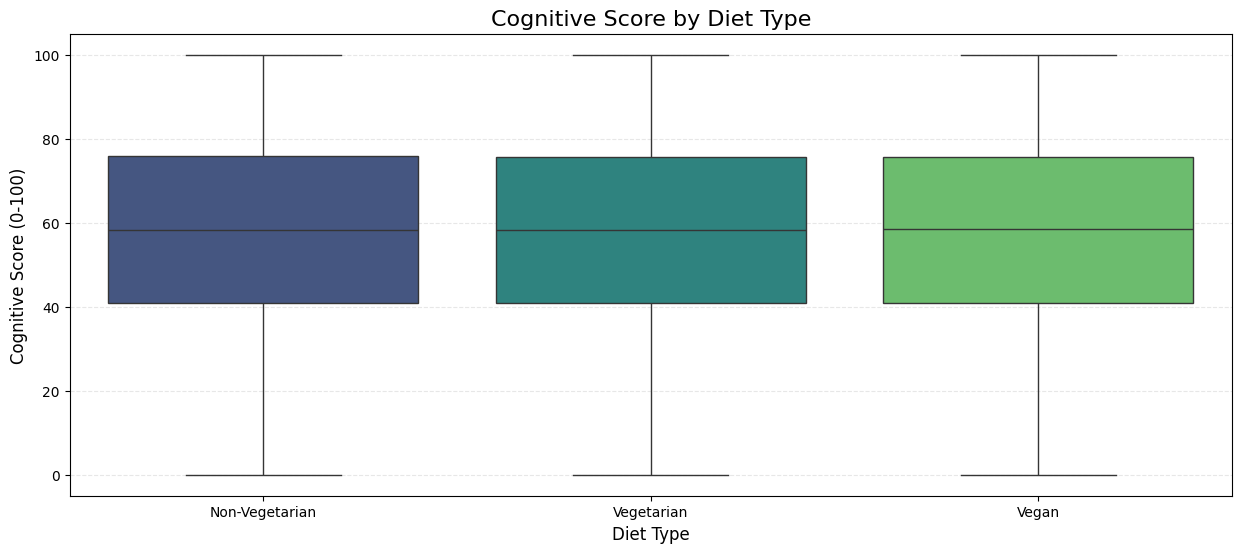

In [51]:
plt.figure(figsize=(15, 6))
sns.boxplot(
    data=df,
    x='Diet_Type',
    y='Cognitive_Score',
    hue='Diet_Type',
    palette='viridis'
)
plt.title("Cognitive Score by Diet Type", fontsize=16)
plt.xlabel("Diet Type", fontsize=12)
plt.ylabel("Cognitive Score (0-100)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

## Scatter plot - Sleep Duration vs Cognitive Score.

This visualtion shows that there is no significant correlation between sleep duration and cognitive score. There are individuals with few hours of sleep per night and still had a high score, and there are also individuals with 10 hours of sleep per night and a low score. According to this data, sleep duration is not a factor that affects the cognitive score.

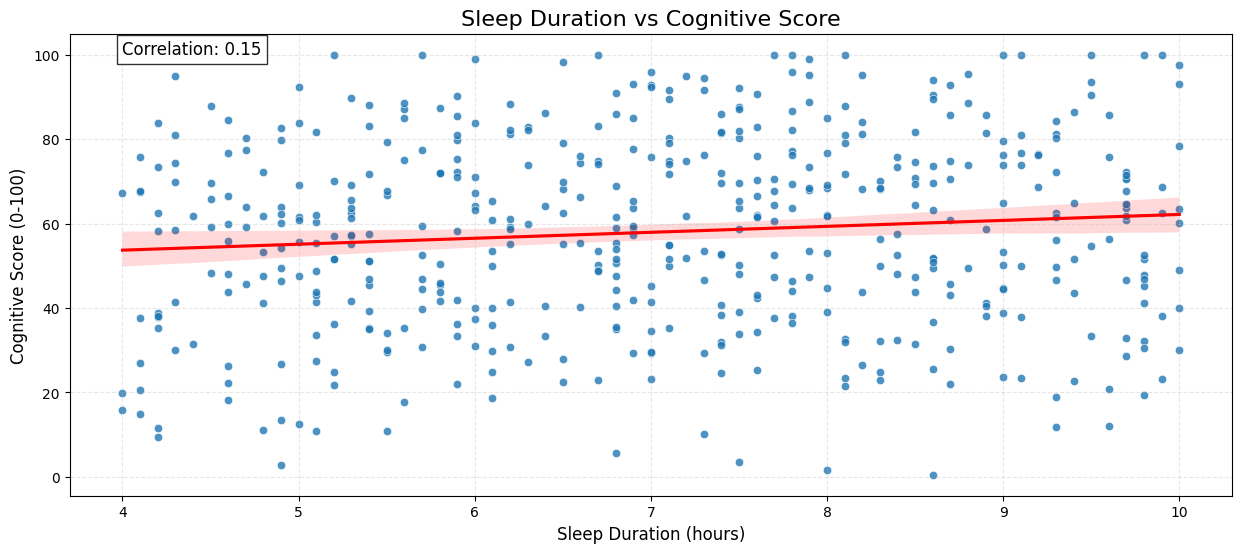

In [52]:
# For reproducibility
np.random.seed(100)  

# Getting a random sample of 500 records
df_sampled = df.sample(n=min(500, len(df)), random_state=100)  

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_sampled,
    x='Sleep_Duration',
    y='Cognitive_Score',
    alpha=0.8
)

# Regression line
sns.regplot(
    data=df_sampled,
    x='Sleep_Duration',
    y='Cognitive_Score',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '-'}
)

# Title and labels
plt.title('Sleep Duration vs Cognitive Score', fontsize=16)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Cognitive Score (0-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate correlation coefficient (optional)
corr = df['Sleep_Duration'].corr(df['Cognitive_Score'])
plt.text(
    x=df['Sleep_Duration'].min(),
    y=df['Cognitive_Score'].max(),
    s=f'Correlation: {corr:.2f}',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.show()

## Scatter plot - Sleep Duration vs Reaction Time.

The relationship between sleep duration and reaction time is almost non-existent. Given the observable results, we can establish that reaction time is not directly affected by the number of sleep hours.

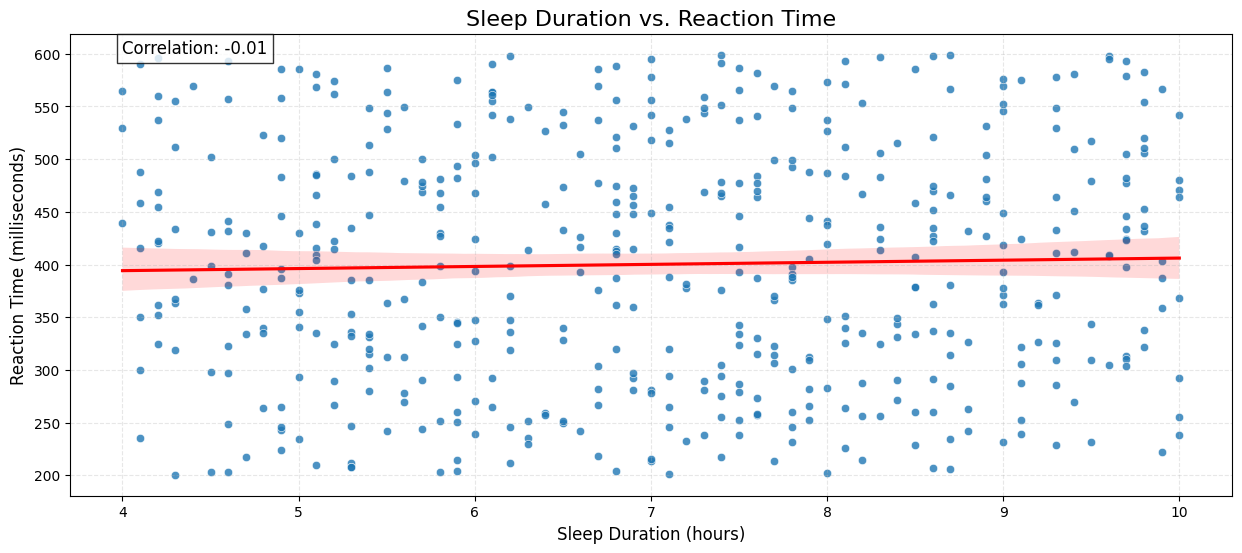

In [53]:
plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_sampled, # Using the data frame with the sample records
    x='Sleep_Duration',
    y='Reaction_Time',
    alpha=0.8
)

# Adding a regression line
sns.regplot(
    data=df_sampled,
    x='Sleep_Duration',
    y='Reaction_Time',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '-'}
)

# Setting the labels and the grid
plt.title("Sleep Duration vs. Reaction Time", fontsize=16)
plt.xlabel("Sleep Duration (hours)", fontsize=12)
plt.ylabel("Reaction Time (milliseconds)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Correlation coefficient
corr = df['Sleep_Duration'].corr(df['Reaction_Time'])
plt.text(
    x=df['Sleep_Duration'].min(),
    y=df['Reaction_Time'].max(),
    s=f"Correlation: {corr:.2f}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.show()

## Scatter plot - Caffeine Intake vs Stress Level.

Caffeine doesn't affect all individuals the same way. This visualization shows that there is absolutely no correlation between these two factors. 

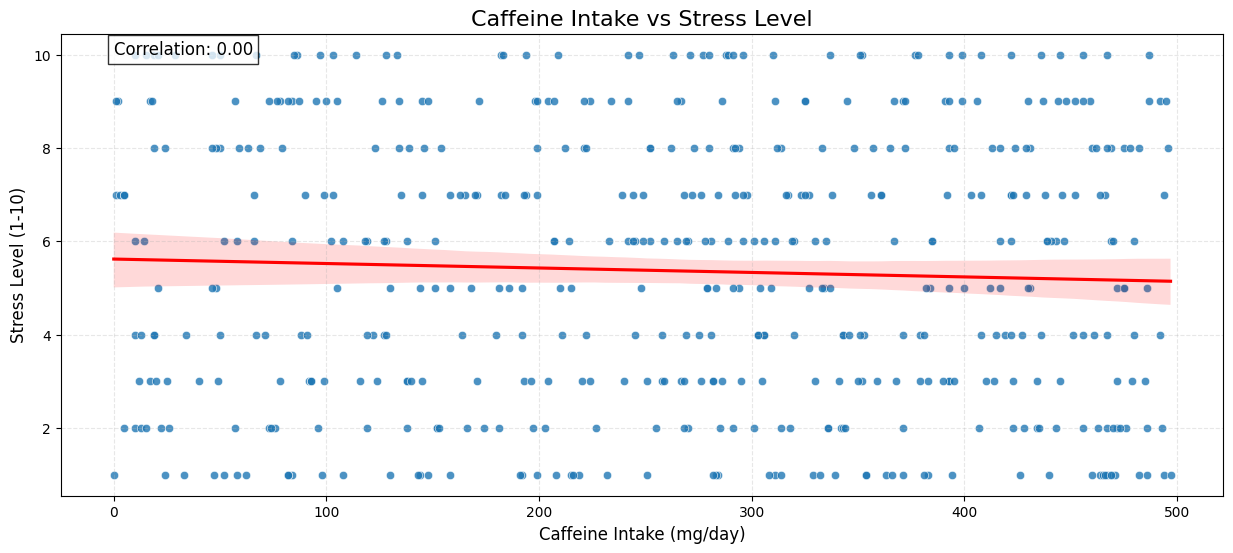

In [54]:
plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_sampled,
    x='Caffeine_Intake',
    y='Stress_Level',
    alpha=0.8
)

# Regression line
sns.regplot(
    data=df_sampled,
    x='Caffeine_Intake',
    y='Stress_Level',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '-'}
)

# Title and labels
plt.title("Caffeine Intake vs Stress Level", fontsize=16)
plt.xlabel("Caffeine Intake (mg/day)", fontsize=12)
plt.ylabel("Stress Level (1-10)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Correlation coefficient
corr = df['Caffeine_Intake'].corr(df['Stress_Level'])
plt.text(
    x=df['Caffeine_Intake'].min(),
    y=df['Stress_Level'].max(),
    s=f"Correlation: {corr:.2f}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.show()

## Box Plot - Stress Level by Exercise Frequency.

This visualization shows an interesting result. People who exercise often has a higher mean level of stress, compared to people who don't exercise that often. People with medium and low exercise frequency have identical levels of stress.

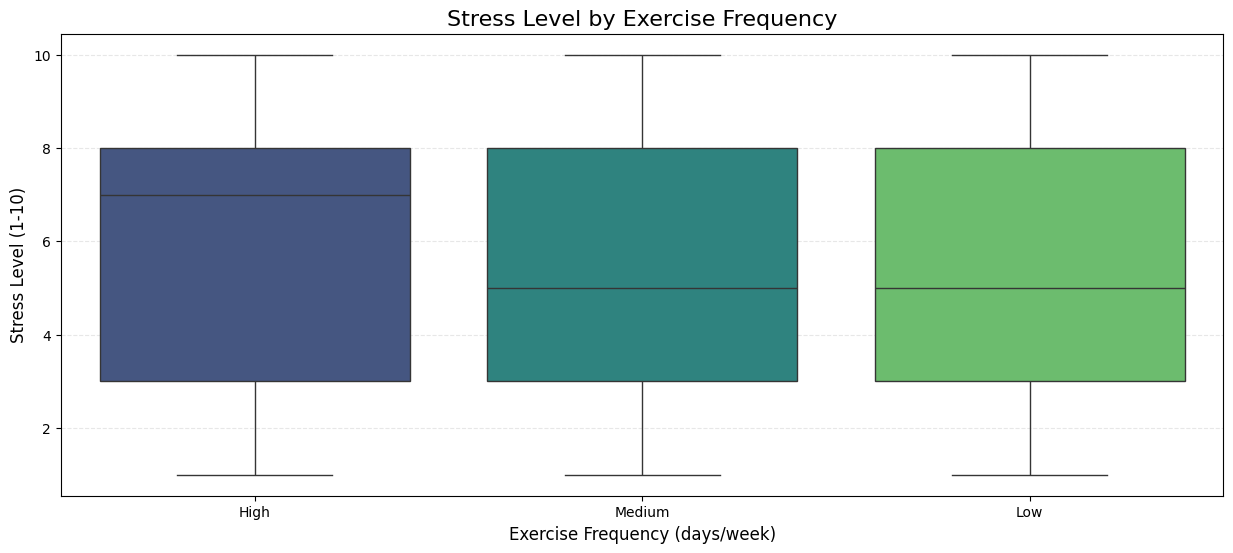

In [55]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    data=df_sampled,
    x='Exercise_Frequency',
    y='Stress_Level',
    hue='Exercise_Frequency',
    palette='viridis'
)
plt.title('Stress Level by Exercise Frequency', fontsize=16)
plt.xlabel('Exercise Frequency (days/week)', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

## Box Plot - Stress Level by Screen Time Group.

People with a screen time between 0 to 6 hours per day (low and medium groups) have identical levels of stress, while people with a higher screen time (more than 6 hours per day) have a lower mean stress level. This is an interesting observation.

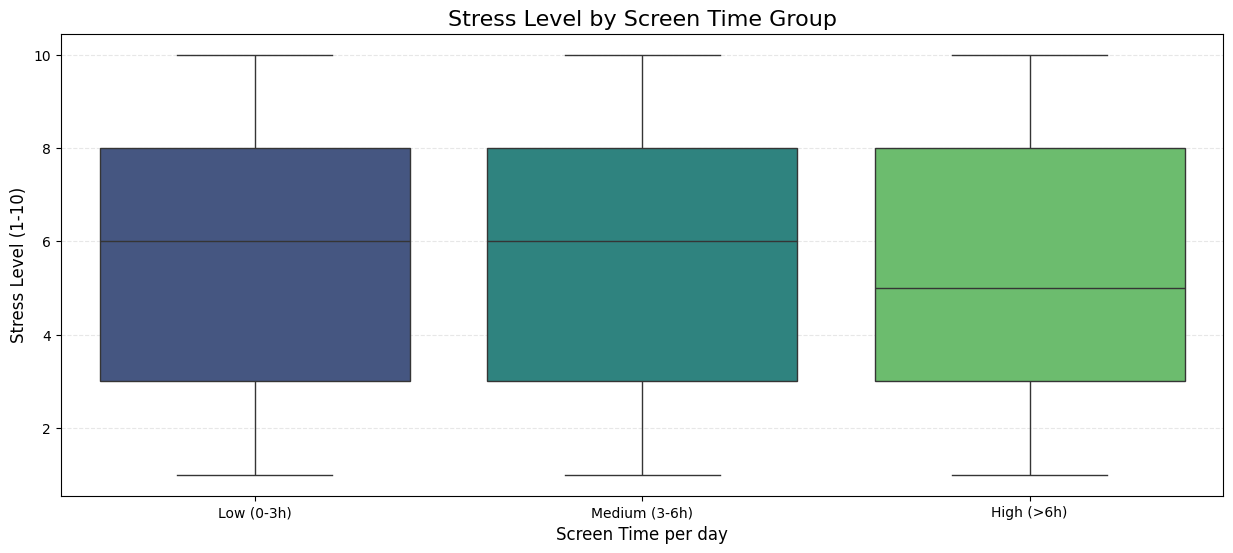

In [56]:
# Bin screen time into groups (e.g., Low/Medium/High)
df['Screen_Time_Group'] = pd.cut(
    df['Daily_Screen_Time'],
    bins=[0, 3, 6, 24],  # Customize bins
    labels=['Low (0-3h)', 'Medium (3-6h)', 'High (>6h)']
)

plt.figure(figsize=(15, 6))

# Box plot
sns.boxplot(
    data=df,
    x='Screen_Time_Group',
    y='Stress_Level',
    palette='viridis',
    hue='Screen_Time_Group'
)
plt.title("Stress Level by Screen Time Group", fontsize=16)
plt.xlabel('Screen Time per day', fontsize=12)
plt.ylabel('Stress Level (1-10)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

## Conclusion: Key Insights from Cognitive Health Analysis

The analysis reveals several unexpected patterns in cognitive health and lifestyle factors:

1) Cognitive Performance shows surprising variability. While low memory scores typically align with low cognitive scores, some individuals defy this trend, achieving high cognitive scores despite poor memory (and vice versa).

2) Diet matters, but not as expected: Vegans exhibit a narrower, higher range of cognitive scores compared to vegetarians and non-vegetarians, though average scores across diets are identical. Non-vegetarians show the widest variability, including extreme low and high performers.

3) Sleep’s limited impact: Neither cognitive scores nor reaction times correlate significantly with sleep duration. This challenges conventional assumptions about sleep’s role in mental performance.

4) Caffeine’s role: Stress levels remain unaffected by caffeine intake, suggesting individual tolerance differences.

5) Exercise and stress levels: Contrary to expectations, frequent exercisers report higher stress levels, while moderate and low exercisers show identical stress levels.

6) Screen Time unexpected results: High screen time (>6 hours/day) correlates with lower stress, while low/medium screen users share similar stress levels. This is a counterintuitive finding.

## Takeaway

Cognitive health is influenced by complex, non-linear interactions. Factors like diet and exercise defy stereotypes, while sleep and caffeine show negligible direct effects. The unexpected stress patterns (screen time, exercise) highlight the need for personalized health strategies rather than one-size-fits-all recommendations.

# Week 8, Term Project Milestone 2: Data Preparation

---

In [57]:
# We can start importing libraries and the dataset again here,
# it is not necesary to go to the top of the notebook

import pandas as pd
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

df = pd.read_csv('human_cognitive_performance.csv')

## Transformations

####  Feature Selection

It is important to drop features that are not necessary. This helps to reduce overfitting, improves model performance, and makes results easier to interpret.

In the dataset used for this exercise, only `User_ID` is irrelevant.

In [58]:
df = df.drop(columns=['User_ID'])

#### Checking for missing values

If the dataframe has missing values, we can determine if we need to drop those rows/columns, or fill them with the mean of the column (for numerical values) or the mode (for categorical values), or something else. It depends on what fields are missing, and what we want to do with the data.

In [59]:
# Checking how many blank fields are in every column.
df.isnull().sum()

Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

There are no missing values from this dataframe.

#### Feature Engineering: Screen Time to Sleep Duration Ratio

This feature will help us to get some insights about the relationship (if any) bewteen screen time and sleep duration. A high ratio may indicate too much screen time relative to sleep; this could mean digital adiction. Also, studies suggest that excessive screen time before bed can disrupt sleep quality. This ratio help quantify this relationship.

In [60]:
# Adding the new feature to the dataframe.
df['Screen_Time_to_Sleep_Ratio'] = df['Daily_Screen_Time'] / df['Sleep_Duration']

df[['Daily_Screen_Time', 'Sleep_Duration', 'Screen_Time_to_Sleep_Ratio']].head()

,Daily_Screen_Time,Sleep_Duration,Screen_Time_to_Sleep_Ratio
0,6.5,6.5,1.000000
1,10.8,7.6,1.421053
2,5.7,8.2,0.695122
3,8.3,7.8,1.064103
4,11.3,9.7,1.164948


#### Feature Engineering: Creating age bins

In [61]:
# Defining bin edges and labels. The dataset doesn't list anyone older than 59
bin_edges = [17, 30, 45, 60]
bin_labels = ['18-30 (Young)', '31-45 (Adult)', '46-60 (Middle-aged)']

# Creating bins
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=True)

# Veryfing the bins
print(df['Age_Group'].value_counts())

Age_Group
31-45 (Adult)          28642
46-60 (Middle-aged)    26729
18-30 (Young)          24629
Name: count, dtype: int64


In [62]:
# Getting the mean Cognitive Score, gruped by Age Group.
df.groupby('Age_Group')['Cognitive_Score'].mean()

Age_Group
18-30 (Young)          58.266308
31-45 (Adult)          58.307946
46-60 (Middle-aged)    57.940608
Name: Cognitive_Score, dtype: float64

#### Detecting Outliers

In [63]:
# Selecting numeric features (excluding the target variable, Cognitive_Score)
numeric_features = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 
                    'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']

numeric_df = df[numeric_features]

# Doing a quick check with statistical summary
numeric_df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000
1%,18.000000,4.100000,1.000000,1.100000,4.000000,204.149900,40.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000
99%,59.000000,9.900000,10.000000,11.900000,494.000000,596.060000,99.000000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000


The following values are outliers and they could skew the model:

|**Feature**|**Outlier 1**|**Outlier 2**|
|---|---|---|
|Caffeine_Intake|0|499|
|Reaction_Time|200|599.99|

We can use the 1st and 99th percentiles as safe bounds for capping:

|**Feature**|**1st**|**99th**|
|---|---|---|
|Caffeine_Intake|4|949|
|Reaction_Time|204.15|596.06|

In [64]:
# Defining bounds (from describe() output)
bounds = {
    'Caffeine_Intake': (4, 494),      # 1st percentile = 4, 99th = 494
    'Reaction_Time': (204.15, 596.06) # 1st percentile = 204.15, 99th = 596.06
}

# Cap outliers
for feature, (lower, upper) in bounds.items():
    df[feature] = df[feature].clip(lower, upper)

#### One-Hot encoding on categorical variables

The dataset has three Categorical features: Gender, Diet Type and Exercise Frequency, plus one more that we added: Age Group. We are going to use a Linear Regression model, and this model assumes all input features are numerical. Therefore, it is necessary to convert these features.

Without encoding, the model might consider categories as continuous numbers. This will lead to incorrect predictions.

In [65]:
# List of categorical features.
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency', 'Age_Group']

# Getting unique values for each one of the categorical features.
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

Gender unique values: ['Female' 'Male' 'Other']
Diet_Type unique values: ['Non-Vegetarian' 'Vegetarian' 'Vegan']
Exercise_Frequency unique values: ['Medium' 'High' 'Low']
Age_Group unique values: ['46-60 (Middle-aged)', '31-45 (Adult)', '18-30 (Young)']
Categories (3, object): ['18-30 (Young)' < '31-45 (Adult)' < '46-60 (Middle-aged)']


In [66]:
from sklearn.preprocessing import OrdinalEncoder

# Getting dummy variables.
# Dropping the first category (drop_first=True) to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=['Gender', 'Diet_Type'], drop_first=True)

ordinal_encoder_exercise = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
ordinal_encoder_age_group = OrdinalEncoder(categories=[['18-30 (Young)', '31-45 (Adult)', '46-60 (Middle-aged)']])

# Using Ordinal Encoding for "Exercise_Frequency"
df_encoded['Exercise_Frequency_encoded'] = ordinal_encoder_exercise.fit_transform(df[['Exercise_Frequency']])

# Using Ordinal Encoding for "Age_Group"
df_encoded['Age_Group_Encoded'] = ordinal_encoder_age_group.fit_transform(df[['Age_Group']])

In [67]:
# Displaying the first rows of the dataframe, with the encoded columns at the end.
df_encoded.head()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score,Screen_Time_to_Sleep_Ratio,Age_Group,Gender_Male,Gender_Other,Diet_Type_Vegan,Diet_Type_Vegetarian,Exercise_Frequency_encoded,Age_Group_Encoded
0,57,6.5,3,6.5,Medium,41,583.33,65,36.71,39.77,1.000000,46-60 (Middle-aged),False,False,False,False,1.0,2.0
1,39,7.6,9,10.8,High,214,368.24,58,54.35,57.68,1.421053,31-45 (Adult),False,False,False,False,2.0,1.0
2,26,8.2,6,5.7,Low,429,445.21,49,32.57,29.54,0.695122,18-30 (Young),True,False,False,True,0.0,0.0
3,32,7.8,9,8.3,Low,464,286.33,94,70.15,74.59,1.064103,31-45 (Adult),True,False,False,True,0.0,1.0
4,50,9.7,2,11.3,Medium,365,237.65,62,87.54,91.78,1.164948,46-60 (Middle-aged),True,False,False,False,1.0,2.0


#### Scaling the numeric features

Scaling is recommended when we have features with different scales, like:

 - Age (18 - 59)
 - Sleep_Duration (4 - 10)
 - Daily_Screen_Time (1 - 12)
 - Caffeine_Intake (0 - 499)
 - Reaction_Time (200 - 600)

Unscaled features can bias the model towards variables with larger magnitutes.

In [68]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Numeric columns to standardize
numeric_columns = ['Age', 'Sleep_Duration', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time']

# Fit and transform the data
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Displaying the standardized DataFrame
df_encoded.head()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score,Screen_Time_to_Sleep_Ratio,Age_Group,Gender_Male,Gender_Other,Diet_Type_Vegan,Diet_Type_Vegetarian,Exercise_Frequency_encoded,Age_Group_Encoded
0,1.526589,-0.291355,3,-0.001467,Medium,-1.439745,1.590278,65,36.71,39.77,1.000000,46-60 (Middle-aged),False,False,False,False,1.0,2.0
1,0.039207,0.342862,9,1.356263,High,-0.242153,-0.275234,58,54.35,57.68,1.421053,31-45 (Adult),False,False,False,False,2.0,1.0
2,-1.035013,0.688798,6,-0.254068,Low,1.246183,0.392340,49,32.57,29.54,0.695122,18-30 (Young),True,False,False,True,0.0,0.0
3,-0.539219,0.458174,9,0.566885,Low,1.488470,-0.985654,94,70.15,74.59,1.064103,31-45 (Adult),True,False,False,True,0.0,1.0
4,0.948163,1.553638,2,1.514138,Medium,0.803144,-1.407864,62,87.54,91.78,1.164948,46-60 (Middle-aged),True,False,False,False,1.0,2.0


#### Dropping unnecessary features.

Since we already have `Exercise_Frequency_Encoded` and `Age_Group_Encoded`, we don't really need to keep `Exercise_Frequency` or `Age_Group`. Feature `AI_Predicted_Score` is also not needed, as it is likely the result of a different model.

In [69]:
# Dropping unnecessary features.
df_encoded = df_encoded.drop(columns=['Exercise_Frequency', 'Age_Group', 'AI_Predicted_Score'])

#### Identify boolean-like features that are currently strings.

If there are features with "TRUE" or "FALSE" values but are actually strings rather than boolean values, we need to convert them to numeric values (TRUE = 1, FALSE = 0.)

In [70]:
# Identifying boolean-like columns that are currently objects (strings)
# and convert them to 0 (FALSE) /1 (TRUE) integers.
boolean_like_cols = ['Gender_Male', 'Gender_Other', 'Diet_Type_Vegan', 'Diet_Type_Vegetarian']

for col in boolean_like_cols:
    if col in df_encoded.columns:
        # If they are strings 'TRUE'/'FALSE', map them to integers.
        if df_encoded[col].dtype == 'object': 
            df_encoded[col] = df_encoded[col].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0}).fillna(0)
        # If they were already parsed as booleans, no need to remap them.
        elif df_encoded[col].dtype == 'bool': 
            df_encoded[col] = df_encoded[col].astype(int)
    # Safeguard in case a feature was removed from the dataframe.
    else:
        print(f'Warning: Column "{col}" not found in the dataset.')

# Displaying the first five converted boolean values
df_encoded[['Gender_Male', 'Gender_Other', 'Diet_Type_Vegan', 'Diet_Type_Vegetarian']].head()        

,Gender_Male,Gender_Other,Diet_Type_Vegan,Diet_Type_Vegetarian
0,0,0,0,0
1,0,0,0,0
2,1,0,0,1
3,1,0,0,1
4,1,0,0,0


# Week 10, Term Project Milestone 3: Model Building and Evaluation

---

### Model 1 - Linear Regression

Target feature: `Cognitive_Score`.

This model was chosen because the target feature is a continuous numerical variable, which aligns with the output of linear regression models. This model provides coefficients for each feature, making it easier to understand how each predictor influences the target feature. After doing some feature engineering, all the categorical features where encoded.

#### Model Evaluation.
For a Linear Regression Model predicting a continuous numerical value, such as `Cognitive_Score`, the following evaluation metrics are commonly used:

 - Mean Squared Error (MSE): It measures the average squared difference between the predicted and actual values.
 - Root Mean Squared Error (RMSE): This is the square root of MSE, it measures the average magnitude of prediction errors in regression models.
 - Mean Absolute Error: It's the average absolute difference between predicted and actual values.
 - R-squared: It measures the proportion of variance in the target explained by the model. The values go from 0 to 1, where 1 means a perfect fit.

In [71]:
# Importing required libraries.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Selecting features and target variable.
X = df_encoded.drop(['Cognitive_Score'], axis=1)
y = df_encoded['Cognitive_Score']

# Splitting data into training and test sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initializing and training the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions.
y_pred = model.predict(X_test)

# Evaluating the model.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('\nModel Evaluation:')
print(f'\tMean Squared Error (MSE): {mse:.2f}')
print(f'\tRoot Mean Squared Error (RMSE): {rmse:.2f}')
print(f'\tMean Absolute Error (MAE): {mae:.2f}')
print(f'\tR-squared: {r_squared:.2f}')


Model Evaluation:
	Mean Squared Error (MSE): 3.74
	Root Mean Squared Error (RMSE): 1.94
	Mean Absolute Error (MAE): 1.31
	R-squared: 0.99


#### Scatter Plot: Actual vs Predicted Cognitive Scores (Linear Regression)

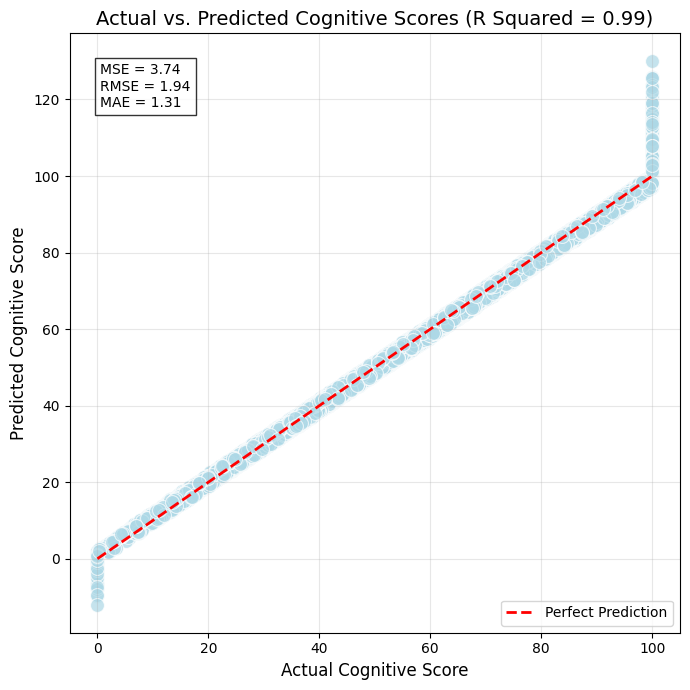

In [72]:
# Creating a dataframe for plotting.
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Creating the scatter plot.
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', alpha=0.7, s=100, color='lightblue')

# Adding a perfect prediction line (y=x).
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title(f'Actual vs. Predicted Cognitive Scores (R Squared = {r_squared:.2f})', fontsize=14)
plt.xlabel('Actual Cognitive Score', fontsize=12)
plt.ylabel('Predicted Cognitive Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Metrics (MSE, RMSE, MAE)
plt.text(0.05, 0.95, 
         f'MSE = {mse:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [73]:
# Calculating the importance (coefficients) of the features,
# in descending order.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print('\nFeature Coefficients:')
print(coefficients)


Feature Coefficients:
                       Feature  Coefficient
12  Exercise_Frequency_encoded     7.585957
1               Sleep_Duration     3.224923
6            Memory_Test_Score     0.484671
13           Age_Group_Encoded     0.067397
11        Diet_Type_Vegetarian     0.047419
9                 Gender_Other     0.034472
8                  Gender_Male     0.016464
10             Diet_Type_Vegan    -0.004707
0                          Age    -0.054948
7   Screen_Time_to_Sleep_Ratio    -0.454827
2                 Stress_Level    -1.929560
4              Caffeine_Intake    -2.783812
3            Daily_Screen_Time    -4.373417
5                Reaction_Time   -18.885181


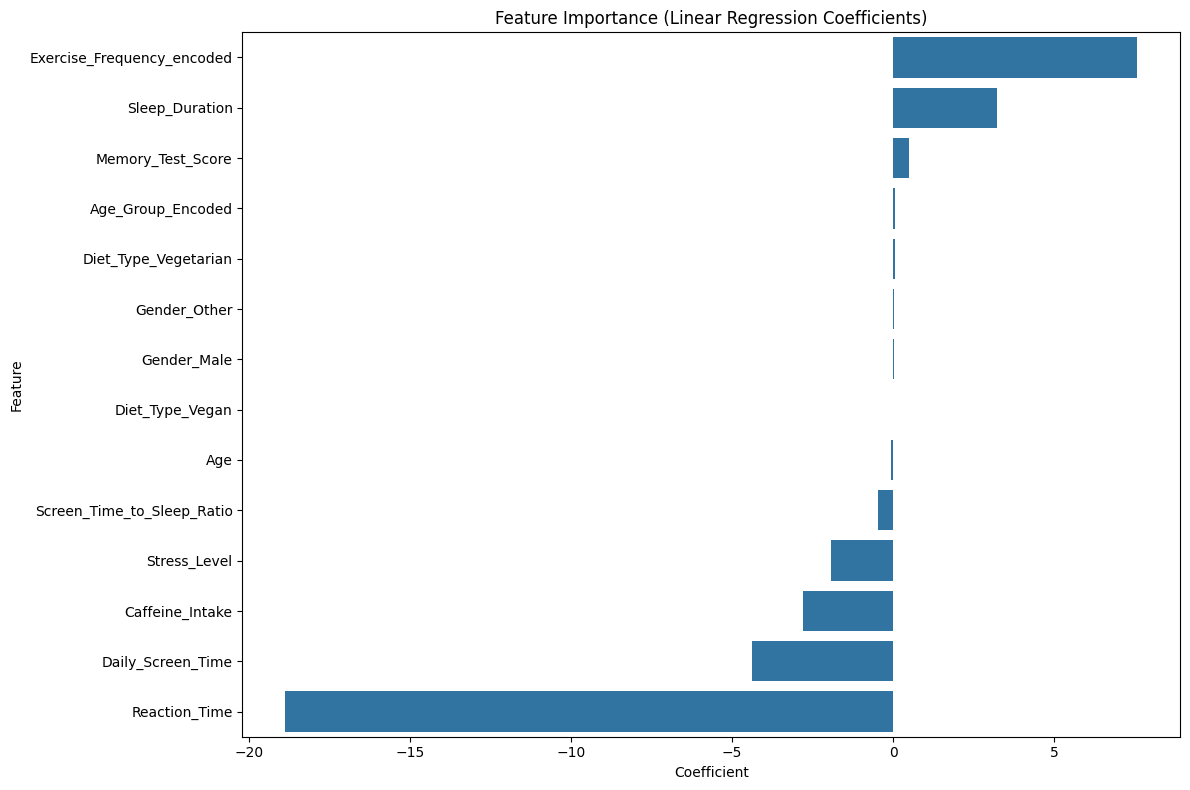

In [74]:
# Plot of feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.tight_layout()
plt.show()

### Key Insights from the Linear Regression Model

 - The R-squared value of 0.99 indicates that this model explains nearly all of the variance in Cognitive Score, suggesting a near-perfect fit to the data. Such a high value should be checked for overfitting.

 - RMSE (1.94) and MAE (1.31) imply predictions are off by ~1.3–1.9 points on average. This is strong for a cognitive score metric.

 - Exercise frequency (+7.59) and sleep duration (+3.22) are the top predictors of higher cognitive scores.
 
 - Reaction time (−18.89) and daily screen time (−4.37) are most associated with lower scores.

 - Gender and diet type have minimal impact (coefficients near zero), suggesting they may not be meaningful predictors.

 This model provides actionable insights, but should be tested on new data to confirm robustness.

### Model 2 - Random Forest Regressor

A Random Forest Regressor seems like a good model for this dataset, due to its ability to handle the data characteristics and deliver high predictive accuracy.

The dataset  contains both numerical and categorical features, and Random Forest models can handle these without any extensive preprocessing (e.g., scaling numerical features or encoding categorical ones).

This model also can capture non-linear relationships. Cognitive performance is likely influenced by complex interactions of features. Unlike Linear Regression models, Random Forest automatically models non-linear patterns.

### Model Evaluation

This model can be evaluated using performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

In [75]:
# We can start running everything from here,
# there is no need to run the whole notebook again.

# Importing required libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading the original dataset (before any conversions).
df = pd.read_csv('human_cognitive_performance.csv')

# Selecting features and target variable.
X = df.drop(columns=['Cognitive_Score', 'User_ID', 'AI_Predicted_Score'])
y = df['Cognitive_Score']

# Identifying categorical and numerical columns.
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encoding of categorical variables.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Splitting data into training and test sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=100
)

# Initializing and training the Random Forest Regressor.
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Max depth of each tree
    random_state=100 
)

# Fitting the model
rf_model.fit(X_train, y_train)

# Prediction on test set
y_pred = rf_model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('\nModel Evaluation:')
print(f'\tMean Squared Error (MSE): {mse:.2f}')
print(f'\tRoot Mean Squared Error (RMSE): {rmse:.2f}')
print(f'\tMean Absolute Error (MAE): {mae:.2f}')
print(f'\tR-squared Score: {r_squared:.2f}')



Model Evaluation:
	Mean Squared Error (MSE): 17.75
	Root Mean Squared Error (RMSE): 4.21
	Mean Absolute Error (MAE): 3.37
	R-squared Score: 0.97


In [76]:
# Feature importance analysis
feature_names = (preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols).tolist() 
                 + numerical_cols)

# New dataframe of features and their importance,
# in descending order                 
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nFeatures and their importance:')
print(feature_importance)


Features and their importance:
                      Feature    Importance
14              Reaction_Time  6.969698e-01
15          Memory_Test_Score  1.318215e-01
7      Exercise_Frequency_Low  5.950405e-02
11               Stress_Level  5.034352e-02
12          Daily_Screen_Time  3.601107e-02
10             Sleep_Duration  1.648709e-02
13            Caffeine_Intake  7.968046e-03
6     Exercise_Frequency_High  4.549824e-04
8   Exercise_Frequency_Medium  4.090184e-04
9                         Age  2.257984e-05
3    Diet_Type_Non-Vegetarian  2.265991e-06
1                 Gender_Male  1.513362e-06
2                Gender_Other  1.386425e-06
0               Gender_Female  1.361633e-06
5        Diet_Type_Vegetarian  1.034294e-06
4             Diet_Type_Vegan  7.854455e-07


#### Scatter Plot: Actual vs Predicted Cognitive Scores (Random Forest)

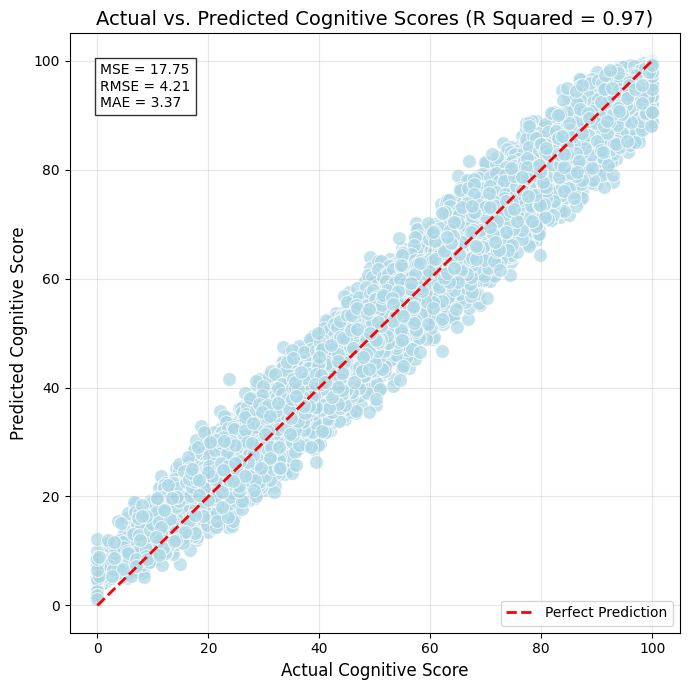

In [77]:
# Creating a dataframe for plotting.
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Creating the scatter plot.
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', alpha=0.7, s=100, color='lightblue')

# Adding a perfect prediction line (y=x).
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title(f'Actual vs. Predicted Cognitive Scores (R Squared = {r_squared:.2f})', fontsize=14)
plt.xlabel('Actual Cognitive Score', fontsize=12)
plt.ylabel('Predicted Cognitive Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Metrics (MSE, RMSE, MAE)
plt.text(0.05, 0.95, 
         f'MSE = {mse:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Key Insights from the Random Forest Regressor Model

The Random Forest Regressor shows great performance in predicting Cognitive Score, with an R-squared score of 0.97 and a low MSE of 17.77. This indicates the model explains nearly all the variance in the data with minimal error.

Dominant Predictive Features:

This model indicates that Reaction Time (69.7% importance) and Memory Test Score (13.2%) are the strongest predictors, suggesting cognitive performance is highly tied to these direct neurocognitive measures.

Exercise Frequency (Low: 5.98%) and Stress Level (5.05%) also played notable roles, highlighting lifestyle factors' impact.

Demographics (Age, Gender) and Diet Type had a neglible impact, implying these factors are less critical for predicting cognitive scores.

The model's high accuracy suggests it is reliable for applications like personalized cognitive health assessments. However, further validation with larger datasets is recommended.